In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
train_data = pd.read_csv("C:/Users/R/Desktop/YEAR 3 NOTES/SEM 1/FINAL YEAR PROJECT/practicals/archive/algeria/Algeria_Data_Train.CSV")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

s from_country dest_airport_code dest_country   
0  GRU       Brazil               MUC      Germany  \
1  GRU       Brazil               MUC      Germany   
2  GRU       Brazil               MUC      Germany   
3  GRU       Brazil               MUC      Germany   
4  GRU       Brazil               MUC      Germany   

                         aircraft_type airline_number         airline_name   
0               Boeing 787|Airbus A320          multi   [LATAM| Lufthansa]  \
1  Airbus A330|Airbus A321|Airbus A320          multi  [Iberia| Lufthansa]   
2                Boeing 787|Boeing 787             AC         [Air Canada]   
3               Boeing 787|Airbus A350          multi  [United| Lufthansa]   
4           Airbus A350|Airbus A320neo             BA    [British Airways]   

          flight_number   departure_time     arrival_time  duration  stops   
0           LA702|LA702  7/28/2022 23:00  7/30/2022 08:15      1695      1  \
1  IB6824|IB6824|IB6824  7/28/2022 14:20  7/29/2022 11:20       960      2   
2             AC91|AC91  7/28/2022 21:20  7/30/2022 07:45      1765      1   
3           UA844|UA844  7/28/2022 22:20  7/30/2022 07:20      1680      1   
4           BA246|BA246  7/28/2022 16:05  7/29/2022 11:50       885      1   

    price currency  co2_emissions  avg_co2_emission_for_this_route   
0  1892.0      USD      3577000.0                         933000.0  \
1  1899.0      USD      4014000.0                         933000.0   
2  2261.0      USD      1925000.0                         933000.0   
3  2330.0      USD      1288000.0                         933000.0   
4  2490.0      USD      2888000.0                         933000.0   

  co2_percentage        scan_date  
0           283%  4/29/2022 17:52  
1           330%  4/29/2022 17:52  
2           106%  4/29/2022 17:52  
3            38%  4/29/2022 17:52  
4           209%  4/29/2022 17:52

In [5]:
train_data.drop(["s", "dest_airport_code","currency", "aircraft_type", "airline_number","flight_number", "avg_co2_emission_for_this_route", "co2_percentage", "co2_emissions"], axis = 1, inplace = True)

In [6]:
train_data.head()

from_country dest_country         airline_name   departure_time   
0       Brazil      Germany   [LATAM| Lufthansa]  7/28/2022 23:00  \
1       Brazil      Germany  [Iberia| Lufthansa]  7/28/2022 14:20   
2       Brazil      Germany         [Air Canada]  7/28/2022 21:20   
3       Brazil      Germany  [United| Lufthansa]  7/28/2022 22:20   
4       Brazil      Germany    [British Airways]  7/28/2022 16:05   

      arrival_time  duration  stops   price        scan_date  
0  7/30/2022 08:15      1695      1  1892.0  4/29/2022 17:52  
1  7/29/2022 11:20       960      2  1899.0  4/29/2022 17:52  
2  7/30/2022 07:45      1765      1  2261.0  4/29/2022 17:52  
3  7/30/2022 07:20      1680      1  2330.0  4/29/2022 17:52  
4  7/29/2022 11:50       885      1  2490.0  4/29/2022 17:52

In [7]:
#checking which is an interger, string, float
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11079 entries, 0 to 11078
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   from_country    11079 non-null  object 
 1   dest_country    11079 non-null  object 
 2   airline_name    11079 non-null  object 
 3   departure_time  11079 non-null  object 
 4   arrival_time    11079 non-null  object 
 5   duration        11079 non-null  int64  
 6   stops           11079 non-null  int64  
 7   price           11077 non-null  float64
 8   scan_date       11079 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 779.1+ KB


In [8]:
#changing the price column from float to interger
train_data['price'].fillna(0, inplace=True)

In [9]:
train_data['price'].replace([np.inf, -np.inf], 0, inplace=True)

In [10]:
train_data['price'] = train_data['price'].astype('int64')

In [11]:
#checking which is an interger, string, float
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11079 entries, 0 to 11078
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   from_country    11079 non-null  object
 1   dest_country    11079 non-null  object
 2   airline_name    11079 non-null  object
 3   departure_time  11079 non-null  object
 4   arrival_time    11079 non-null  object
 5   duration        11079 non-null  int64 
 6   stops           11079 non-null  int64 
 7   price           11079 non-null  int64 
 8   scan_date       11079 non-null  object
dtypes: int64(3), object(6)
memory usage: 779.1+ KB


In [12]:
train_data['duration'].value_counts()

duration
2355    64
1660    54
1995    51
1295    47
790     47
        ..
1562     1
1764     1
1934     1
2774     1
4263     1
Name: count, Length: 1468, dtype: int64

In [13]:
train_data.shape

(11079, 9)

In [14]:
#data cleaning or removing empty cells 
train_data.dropna(inplace = True)

In [15]:
train_data.shape

(11079, 9)

In [16]:
#checking for empty cells
train_data.isnull().sum()

from_country      0
dest_country      0
airline_name      0
departure_time    0
arrival_time      0
duration          0
stops             0
price             0
scan_date         0
dtype: int64

In [17]:
#Separating the scan_date column into date and time
train_data['scan_date']
train_data['scan_date'] = pd.to_datetime(train_data['scan_date'])

In [18]:
train_data['Sdate'] = train_data['scan_date'].dt.date
train_data['Stime'] = train_data['scan_date'].dt.time

In [19]:
#spliting SCAN time.
train_data['Shours'] = train_data['scan_date'].dt.hour
train_data['Sminutes'] = train_data['scan_date'].dt.minute
train_data['Sseconds'] = train_data['scan_date'].dt.second

In [20]:
train_data['scan_day'] = pd.to_datetime(train_data.Sdate, format ="%d/%m/%y").dt.day

In [21]:
train_data['scan_month'] = pd.to_datetime(train_data.Sdate, format ="%d/%m/%y").dt.month

In [22]:
#droping the scan date
train_data.drop(["scan_date"], axis = 1, inplace = True)

In [23]:
#droping the sdate
train_data.drop(["Sdate"], axis = 1, inplace = True)

In [24]:
#droping the stime
train_data.drop(["Stime"], axis = 1, inplace = True)

In [25]:
#separating departure column into date and time
train_data['departure_time']
train_data['departure_time'] = pd.to_datetime(train_data['departure_time'])

In [26]:
train_data['Ddate'] = train_data['departure_time'].dt.date
train_data['Dtime'] = train_data['departure_time'].dt.time

In [27]:
train_data['Dhours'] = train_data['departure_time'].dt.hour
train_data['Dminutes'] = train_data['departure_time'].dt.minute
train_data['Dseconds'] = train_data['departure_time'].dt.second

In [28]:
train_data['departure_day'] = pd.to_datetime(train_data.Ddate, format ="%d/%m/%y").dt.day

In [29]:
train_data ['departure_month'] = pd.to_datetime(train_data.Ddate, format ="%d/%m/%y").dt.month

In [30]:
train_data.drop(["Ddate"], axis = 1, inplace = True)

In [31]:
train_data.drop(["Dtime"], axis = 1, inplace = True)

In [32]:
train_data.drop(["departure_time"], axis = 1, inplace = True)

In [33]:
#separating the arrival column into date and time.
train_data['arrival_time']
train_data['arrival_time'] = pd.to_datetime(train_data['arrival_time'])

In [34]:
train_data['Rdate'] = train_data['arrival_time'].dt.date
train_data['Rtime'] = train_data['arrival_time'].dt.time

In [35]:
train_data['arrival_day'] = pd.to_datetime(train_data.Rdate, format ="%d/%m/%y").dt.day

In [36]:
train_data['arrival_month'] = pd.to_datetime(train_data.Rdate, format ="%d/%m/%y").dt.month

In [37]:
#splitting arrival time
train_data['Ahours'] = train_data['arrival_time'].dt.hour
train_data['Aminutes'] = train_data['arrival_time'].dt.minute
train_data['Aseconds'] = train_data['arrival_time'].dt.second

In [38]:
train_data.drop(["arrival_time"], axis = 1, inplace = True)

In [39]:
train_data.drop(["Rdate"], axis = 1, inplace = True)

In [40]:
train_data.drop(["Rtime"], axis = 1, inplace = True)

In [41]:
train_data["airline_name"].value_counts()

airline_name
[Lufthansa]                               734
[Air Canada]                              431
[United]                                  355
[American]                                316
[LATAM]                                   287
                                         ... 
[Norwegian| Flyr AS]                        1
[Lufthansa| LATAM| Gol]                     1
[Air Arabia| Etihad]                        1
[Wizz Air| Turkish Airlines| EgyptAir]      1
[Air Canada| Azul]                          1
Name: count, Length: 716, dtype: int64

In [42]:
#handling categorical data

#norminal data--------------onehotencoding
#ordinal data---------------labelencoding


In [43]:
train_data["airline_name"].value_counts()

airline_name
[Lufthansa]                               734
[Air Canada]                              431
[United]                                  355
[American]                                316
[LATAM]                                   287
                                         ... 
[Norwegian| Flyr AS]                        1
[Lufthansa| LATAM| Gol]                     1
[Air Arabia| Etihad]                        1
[Wizz Air| Turkish Airlines| EgyptAir]      1
[Air Canada| Azul]                          1
Name: count, Length: 716, dtype: int64

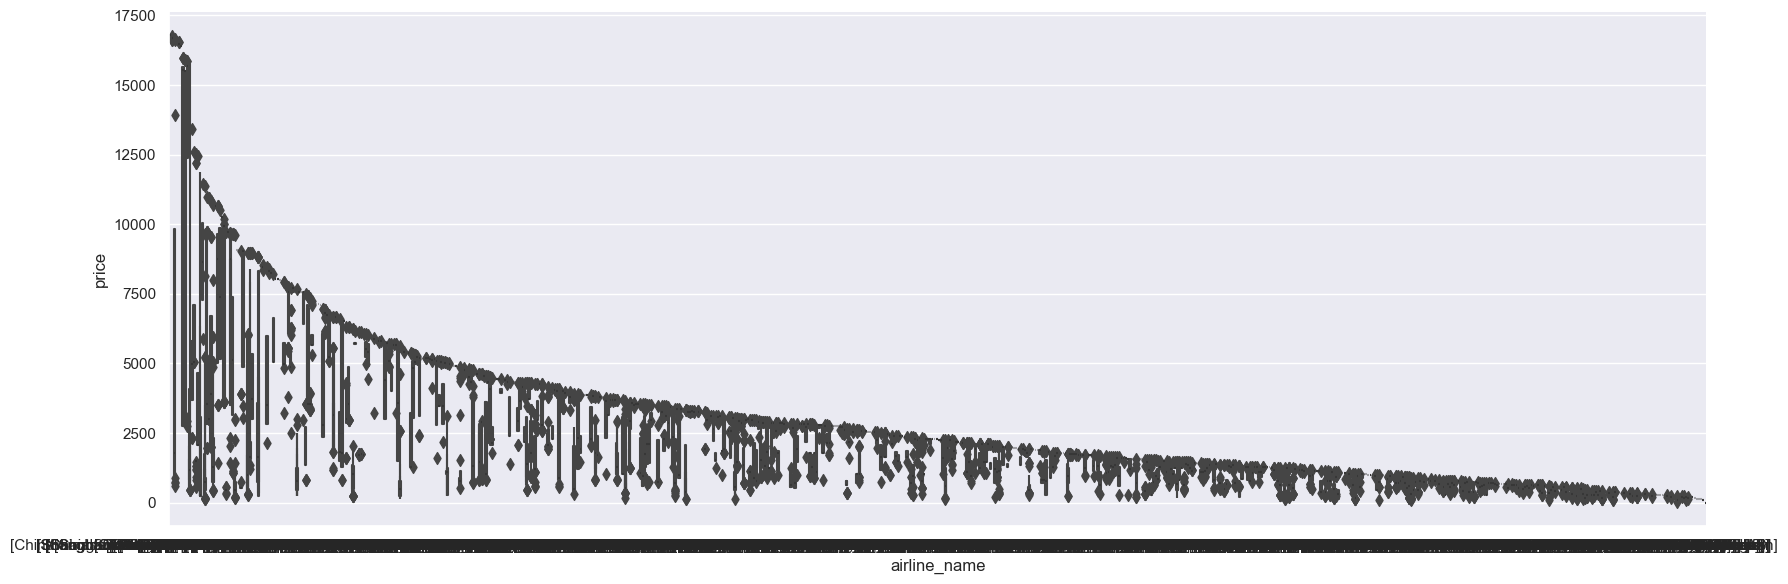

In [44]:
#the graph shows the airline with  the highest price

#airline vs price
sns.catplot(y = "price", x="airline_name", data = train_data.sort_values("price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

In [45]:
# airline onehotencoding

airline_name = train_data[["airline_name"]]

#Airline = pd.get_dummies(Airline, drop_first = True)
airline_name = pd.get_dummies(airline_name, drop_first=True, dtype=bool)

airline_name = airline_name.astype(int)

airline_name.head()

airline_name_[ANA| Avianca]  airline_name_[ANA| Avianca| COPA]   
0                            0                                  0  \
1                            0                                  0   
2                            0                                  0   
3                            0                                  0   
4                            0                                  0   

   airline_name_[ANA| COPA]  airline_name_[ANA| LATAM]   
0                         0                          0  \
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   airline_name_[ANA| Singapore Airlines| COPA]  airline_name_[ANA| United]   
0                                             0                           0  \
1                                             0                           0   
2                                             0                           0   
3                                             0                           0   
4                                             0                           0   

   airline_name_[ANA| United| Avianca]  airline_name_[ANA| United| Azul]   
0                                    0                                 0  \
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   airline_name_[ANA| United| COPA]  airline_name_[Aegean]   
0                                 0                      0  \
1                                 0                      0   
2                                 0                      0   
3                                 0                      0   
4                                 0                      0   

   airline_name_[Aegean| Air Canada]  airline_name_[Aegean| Air Serbia]   
0                                  0                                  0  \
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   airline_name_[Aegean| Brussels Airlines]   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   airline_name_[Aegean| Brussels Airlines| United]   
0                                                 0  \
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   airline_name_[Aegean| EgyptAir]  airline_name_[Aegean| Eurowings Discover]   
0                                0                                          0  \
1                                0                                          0   
2                                0                                          0   
3                                0                                          0   
4                                0                                          0   

   airline_name_[Aegean| Icelandair| JetBlue]   
0                                           0  \
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   airline_name_[Aegean| Icelandair| Sun Country Airlines]   
0                        

In [46]:
train_data["from_country"].value_counts()

from_country
Denmark     2042
Canada      1849
Columbia    1315
Brazil      1167
India       1112
Greece      1112
China       1101
Dublin       892
Chile        489
Name: count, dtype: int64

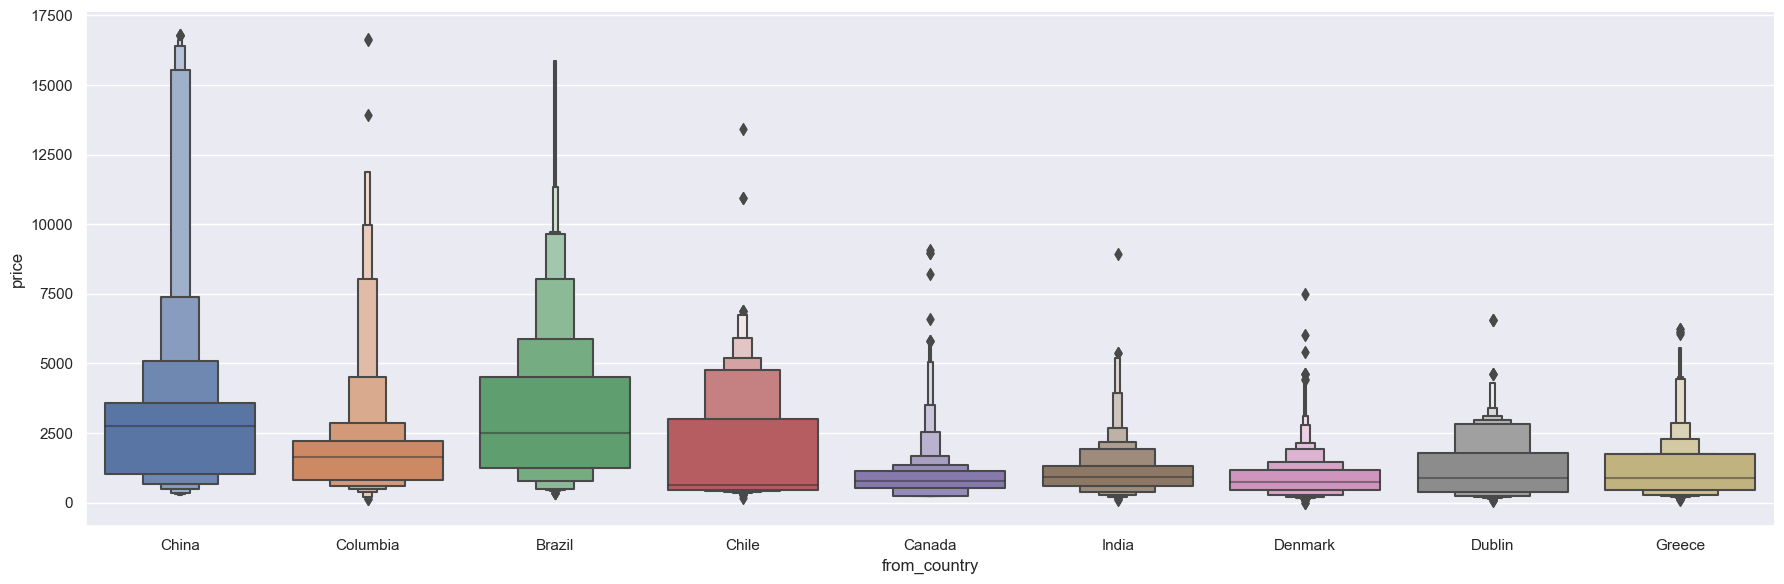

In [47]:
#source vs price

sns.catplot(y = "price", x="from_country", data = train_data.sort_values("price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

In [48]:
#one hotencoding for source

from_country = train_data[["from_country"]]

from_country = pd.get_dummies(from_country, drop_first = True)

from_country = from_country.astype(int)

from_country.head()

from_country_Canada  from_country_Chile  from_country_China   
0                    0                   0                   0  \
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   

   from_country_Columbia  from_country_Denmark  from_country_Dublin   
0                      0                     0                    0  \
1                      0                     0                    0   
2                      0                     0                    0   
3                      0                     0                    0   
4                      0                     0                    0   

   from_country_Greece  from_country_India  
0                    0                   0  
1                    0                   0  
2                    0                   0  
3                    0                   0  
4                    0                   0

In [49]:
train_data["dest_country"].value_counts()

dest_country
United States     1200
Brazil            1178
Australia         1111
Egypt              954
France             771
Argentina          576
Kenya              561
India              482
Dublin             461
Thailand           423
United Kingdom     413
Denmark            380
Panama             350
Turkey             322
Germany            322
China              275
Zurich             246
Vietnam            170
Columbia           165
Austria            162
Spain              154
Russia              96
Morocco             73
Taiwan              66
Portugal            65
Norway              44
Philippines         40
Belgium             13
Mexico               6
Name: count, dtype: int64

In [50]:
#onehotencoding for destination

dest_country = train_data[["dest_country"]]

dest_country= pd.get_dummies(dest_country, drop_first = True)

dest_country = dest_country.astype(int)

dest_country.head()

dest_country_Australia  dest_country_Austria  dest_country_Belgium   
0                       0                     0                     0  \
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   

   dest_country_Brazil  dest_country_China  dest_country_Columbia   
0                    0                   0                      0  \
1                    0                   0                      0   
2                    0                   0                      0   
3                    0                   0                      0   
4                    0                   0                      0   

   dest_country_Denmark  dest_country_Dublin  dest_country_Egypt   
0                     0                    0                   0  \
1                     0                    0                   0   
2                     0                    0                   0   
3                     0                    0                   0   
4                     0                    0                   0   

   dest_country_France  dest_country_Germany  dest_country_India   
0                    0                     1                   0  \
1                    0                     1                   0   
2                    0                     1                   0   
3                    0                     1                   0   
4                    0                     1                   0   

   dest_country_Kenya  dest_country_Mexico  dest_country_Morocco   
0                   0                    0                     0  \
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     0   

   dest_country_Norway  dest_country_Panama  dest_country_Philippines   
0                    0                    0                         0  \
1                    0                    0                         0   
2                    0                    0                         0   
3                    0                    0                         0   
4                    0                    0                         0   

   dest_country_Portugal  dest_country_Russia  dest_country_Spain   
0                      0                    0                   0  \
1                      0                    0                   0   
2                      0                    0                   0   
3                      0                    0                   0   
4                      0                    0                   0   

   dest_country_Taiwan  dest_country_Thailand  dest_country_Turkey   
0                    0                      0                    0  \
1                    0                      0                    0   
2                    0                      0                    0   
3                    0                      0                    0   
4                    0                      0                    0   

   dest_country_United Kingdom  dest_country_United States   
0                            0                           0  \
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   dest_country_Vietnam  dest_country_Zurich  
0                     0                    0  
1                     0                    0  
2                     0                    0  
3                     0                    0  
4                     0                

In [51]:
train_data["stops"].value_counts()

stops
2    4829
1    4803
3    1171
0     240
4      36
Name: count, dtype: int64

In [52]:
train_data.replace({ "0 stop": 0, "1 stop": 1,"2 stop": 2, "3 stop": 3, "4 stop":4 }, inplace = True)

In [53]:
#concating the dataframe -----train_data, airline, source, destination

data_train = pd.concat([train_data, airline_name, from_country, dest_country], axis = 1)

In [54]:
data_train.head()

from_country dest_country         airline_name  duration  stops  price   
0       Brazil      Germany   [LATAM| Lufthansa]      1695      1   1892  \
1       Brazil      Germany  [Iberia| Lufthansa]       960      2   1899   
2       Brazil      Germany         [Air Canada]      1765      1   2261   
3       Brazil      Germany  [United| Lufthansa]      1680      1   2330   
4       Brazil      Germany    [British Airways]       885      1   2490   

   Shours  Sminutes  Sseconds  scan_day  scan_month  Dhours  Dminutes   
0      17        52         0        29           4      23         0  \
1      17        52         0        29           4      14        20   
2      17        52         0        29           4      21        20   
3      17        52         0        29           4      22        20   
4      17        52         0        29           4      16         5   

   Dseconds  departure_day  departure_month  arrival_day  arrival_month   
0         0             28                7           30              7  \
1         0             28                7           29              7   
2         0             28                7           30              7   
3         0             28                7           30              7   
4         0             28                7           29              7   

   Ahours  Aminutes  Aseconds  airline_name_[ANA| Avianca]   
0       8        15         0                            0  \
1      11        20         0                            0   
2       7        45         0                            0   
3       7        20         0                            0   
4      11        50         0                            0   

   airline_name_[ANA| Avianca| COPA]  airline_name_[ANA| COPA]   
0                                  0                         0  \
1                                  0                         0   
2                                  0                         0   
3                                  0                         0   
4                                  0                         0   

   airline_name_[ANA| LATAM]  airline_name_[ANA| Singapore Airlines| COPA]   
0                          0                                             0  \
1                          0                                             0   
2                          0                                             0   
3                          0                                             0   
4                          0                                             0   

   airline_name_[ANA| United]  airline_name_[ANA| United| Avianca]   
0                           0                                    0  \
1                           0                                    0   
2                           0                                    0   
3                           0                                    0   
4                           0                                    0   

   airline_name_[ANA| United| Azul]  airline_name_[ANA| United| COPA]   
0                                 0                                 0  \
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   airline_name_[Aegean]  airline_name_[Aegean| Air Canada]   
0                      0                                  0  \
1                      0                                  0   
2                      0                                  0   
3                      0                                  0   
4                      0                                  0   

   airline_name_[Aegean| Air Serbia]   
0                                  0  \
1                                  0   
2                                  0   
3                

In [55]:
data_train.drop(["airline_name", "from_country", "dest_country"], axis = 1, inplace = True)

In [56]:
data_train.head()

duration  stops  price  Shours  Sminutes  Sseconds  scan_day  scan_month   
0      1695      1   1892      17        52         0        29           4  \
1       960      2   1899      17        52         0        29           4   
2      1765      1   2261      17        52         0        29           4   
3      1680      1   2330      17        52         0        29           4   
4       885      1   2490      17        52         0        29           4   

   Dhours  Dminutes  Dseconds  departure_day  departure_month  arrival_day   
0      23         0         0             28                7           30  \
1      14        20         0             28                7           29   
2      21        20         0             28                7           30   
3      22        20         0             28                7           30   
4      16         5         0             28                7           29   

   arrival_month  Ahours  Aminutes  Aseconds  airline_name_[ANA| Avianca]   
0              7       8        15         0                            0  \
1              7      11        20         0                            0   
2              7       7        45         0                            0   
3              7       7        20         0                            0   
4              7      11        50         0                            0   

   airline_name_[ANA| Avianca| COPA]  airline_name_[ANA| COPA]   
0                                  0                         0  \
1                                  0                         0   
2                                  0                         0   
3                                  0                         0   
4                                  0                         0   

   airline_name_[ANA| LATAM]  airline_name_[ANA| Singapore Airlines| COPA]   
0                          0                                             0  \
1                          0                                             0   
2                          0                                             0   
3                          0                                             0   
4                          0                                             0   

   airline_name_[ANA| United]  airline_name_[ANA| United| Avianca]   
0                           0                                    0  \
1                           0                                    0   
2                           0                                    0   
3                           0                                    0   
4                           0                                    0   

   airline_name_[ANA| United| Azul]  airline_name_[ANA| United| COPA]   
0                                 0                                 0  \
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   airline_name_[Aegean]  airline_name_[Aegean| Air Canada]   
0                      0                                  0  \
1                      0                                  0   
2                      0                                  0   
3                      0                                  0   
4                      0                                  0   

   airline_name_[Aegean| Air Serbia]   
0                                  0  \
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   airline_name_[Aegean| Brussels Airlines]   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4              

In [57]:
#TEST DATA

In [65]:
test_data = pd.read_csv("C:/Users/R/Desktop/YEAR 3 NOTES/SEM 1/FINAL YEAR PROJECT/practicals/archive/algeria/Algeria_Test_Set.csv")

In [66]:
test_data.head()

source_country from_country dest_airport_code dest_country   
0            ALG      Algeria               AEP    Argentina  \
1            ALG      Algeria               AEP    Argentina   
2            ALG      Algeria               AEP    Argentina   
3            ALG      Algeria               AEP    Argentina   
4            ALG      Algeria               AEP    Argentina   

                                       aircraft_type airline_number   
0  Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...          multi  \
1  Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...          multi   
2     Airbus A320|Airbus A321|Boeing 787|Airbus A320          multi   
3     Airbus A318|Airbus A320|Boeing 787|Airbus A320          multi   
4              Airbus A321neo|Boeing 777|Airbus A320          multi   

                  airline_name                flight_number   departure_time   
0  [Air France| Iberia| LATAM]  AF1491|AF1491|AF1491|AF1491  4/30/2022 14:30  \
1  [Air France| Iberia| LATAM]  AF1491|AF1491|AF1491|AF1491  4/30/2022 14:30   
2          [Air France| LATAM]  AF1855|AF1855|AF1855|AF1855  4/30/2022 12:45   
3          [Air France| LATAM]  AF1491|AF1491|AF1491|AF1491  4/30/2022 14:30   
4           [Lufthansa| LATAM]         LH1317|LH1317|LH1317  4/30/2022 12:35   

     arrival_time  duration  stops  price currency  co2_emissions   
0  5/1/2022 10:15      1425      3   1279      USD      1320000.0  \
1  5/1/2022 10:15      1425      3   1279      USD      1195000.0   
2  5/1/2022 10:15      1530      3   1284      USD      1248000.0   
3  5/1/2022 10:15      1425      3   1290      USD      1347000.0   
4  5/1/2022 10:15      1540      2   1347      USD      1381000.0   

   avg_co2_emission_for_this_route co2_percentage        scan_date  
0                        1320000.0             0%  4/29/2022 17:52  
1                        1320000.0            -9%  4/29/2022 17:52  
2                        1320000.0            -5%  4/29/2022 17:52  
3                        1320000.0             2%  4/29/2022 17:52  
4                        1320000.0             4%  4/29/2022 17:52

In [67]:
#preprocessing

print("Test data Info")
print("_"*75)
print(test_data.info())

print()
print()

print("Null values: ")
print("_"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())



#drop unwanted columns
test_data.drop(["source_country", "dest_airport_code","currency", "price","aircraft_type", "airline_number","flight_number", "avg_co2_emission_for_this_route", "co2_percentage", "co2_emissions"], axis = 1, inplace = True)



#Separating the scan_date column into date and time
test_data['scan_date']
test_data['scan_date'] = pd.to_datetime(test_data['scan_date'])

test_data['Sdate'] = test_data['scan_date'].dt.date
test_data['Stime'] = test_data['scan_date'].dt.time

#spliting SCAN time.
test_data['Shours'] = test_data['scan_date'].dt.hour
test_data['Sminutes'] = test_data['scan_date'].dt.minute
test_data['Sseconds'] = test_data['scan_date'].dt.second

test_data['scan_day'] = pd.to_datetime(test_data.Sdate, format ="%d/%m/%y").dt.day
test_data['scan_month'] = pd.to_datetime(test_data.Sdate, format ="%d/%m/%y").dt.month

#droping the scan date
test_data.drop(["scan_date"], axis = 1, inplace = True)

#droping the sdate
test_data.drop(["Sdate"], axis = 1, inplace = True)

#droping the stime
test_data.drop(["Stime"], axis = 1, inplace = True)



#separating departure column into date and time
test_data['departure_time']
test_data['departure_time'] = pd.to_datetime(test_data['departure_time'])

test_data['Ddate'] = test_data['departure_time'].dt.date
test_data['Dtime'] = test_data['departure_time'].dt.time

test_data['Dhours'] = test_data['departure_time'].dt.hour
test_data['Dminutes'] = test_data['departure_time'].dt.minute
test_data['Dseconds'] = test_data['departure_time'].dt.second

test_data['departure_day'] = pd.to_datetime(test_data.Ddate, format ="%d/%m/%y").dt.day
test_data['departure_month'] = pd.to_datetime(test_data.Ddate, format ="%d/%m/%y").dt.month

test_data.drop(["Ddate"], axis = 1, inplace = True)
test_data.drop(["Dtime"], axis = 1, inplace = True)
test_data.drop(["departure_time"], axis = 1, inplace = True)





#separating the arrival column into date and time.
test_data['arrival_time']
test_data['arrival_time'] = pd.to_datetime(test_data['arrival_time'])

test_data['Rdate'] = test_data['arrival_time'].dt.date
test_data['Rtime'] = test_data['arrival_time'].dt.time

test_data['arrival_day'] = pd.to_datetime(test_data.Rdate, format ="%d/%m/%y").dt.day
test_data['arrival_month'] = pd.to_datetime(test_data.Rdate, format ="%d/%m/%y").dt.month

#splitting arrival time
test_data['Ahours'] = test_data['arrival_time'].dt.hour
test_data['Aminutes'] = test_data['arrival_time'].dt.minute
test_data['Aseconds'] = test_data['arrival_time'].dt.second

test_data.drop(["Rdate"], axis = 1, inplace = True)
test_data.drop(["Rtime"], axis = 1, inplace = True)
test_data.drop(["arrival_time"], axis = 1, inplace = True)








# airline onehotencoding

airline_name = test_data[["airline_name"]]

#Airline = pd.get_dummies(Airline, drop_first = True)

airline_name = pd.get_dummies(airline_name, drop_first=True, dtype=bool)

airline_name = airline_name.astype(int)

airline_name.head()




#one hotencoding for source

from_country = test_data[["from_country"]]

from_country = pd.get_dummies(from_country, drop_first = True)

from_country = from_country.astype(int)

from_country.head()




#onehotencoding for destination

dest_country = test_data[["dest_country"]]

dest_country= pd.get_dummies(dest_country, drop_first = True)

dest_country = dest_country.astype(int)

dest_country.head()



#concating the dataframe -----train_data, airline, source, destination

data_test = pd.concat([test_data, airline_name, from_country, dest_country], axis = 1)







Test data Info
___________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2599 entries, 0 to 2598
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source_country                   2599 non-null   object 
 1   from_country                     2599 non-null   object 
 2   dest_airport_code                2599 non-null   object 
 3   dest_country                     2599 non-null   object 
 4   aircraft_type                    2597 non-null   object 
 5   airline_number                   2599 non-null   object 
 6   airline_name                     2599 non-null   object 
 7   flight_number                    2599 non-null   object 
 8   departure_time                   2599 non-null   object 
 9   arrival_time                     2599 non-null   object 
 10  duration                         2599 non-null   int6

In [68]:
data_test.drop(["airline_name", "from_country", "dest_country"], axis = 1, inplace = True)

In [69]:
data_test.head()

duration  stops  Shours  Sminutes  Sseconds  scan_day  scan_month  Dhours   
0      1425      3      17        52         0        29           4      14  \
1      1425      3      17        52         0        29           4      14   
2      1530      3      17        52         0        29           4      12   
3      1425      3      17        52         0        29           4      14   
4      1540      2      17        52         0        29           4      12   

   Dminutes  Dseconds  departure_day  departure_month  arrival_day   
0        30         0             30                4            1  \
1        30         0             30                4            1   
2        45         0             30                4            1   
3        30         0             30                4            1   
4        35         0             30                4            1   

   arrival_month  Ahours  Aminutes  Aseconds  airline_name_[Air Canada]   
0              5      10        15         0                          0  \
1              5      10        15         0                          0   
2              5      10        15         0                          0   
3              5      10        15         0                          0   
4              5      10        15         0                          0   

   airline_name_[Air Canada| United]  airline_name_[Air France]   
0                                  0                          0  \
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   airline_name_[Air France| Aer Lingus]  airline_name_[Air France| Austrian]   
0                                      0                                    0  \
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   airline_name_[Air France| British Airways| LATAM]   
0                                                  0  \
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   airline_name_[Air France| Delta]   
0                                 0  \
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   airline_name_[Air France| Delta| WestJet]   
0                                          0  \
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   airline_name_[Air France| Iberia| LATAM]  airline_name_[Air France| KLM]   
0                                         1                               0  \
1                                         1                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   

   airline_name_[Air France| LATAM]   
0                                 0  \
1                                 0   
2                                 1   
3                                 1   
4                                 0   

   airline_name_[Air France| Lufthansa| LATAM]   
0                                            0  \
1                                            0   
2                                      

In [76]:
data_train.columns

Index(['duration', 'stops', 'price', 'Shours', 'Sminutes', 'Sseconds',
       'scan_day', 'scan_month', 'Dhours', 'Dminutes',
       ...
       'dest_country_Portugal', 'dest_country_Russia', 'dest_country_Spain',
       'dest_country_Taiwan', 'dest_country_Thailand', 'dest_country_Turkey',
       'dest_country_United Kingdom', 'dest_country_United States',
       'dest_country_Vietnam', 'dest_country_Zurich'],
      dtype='object', length=769)

In [79]:
X = data_train.loc[:, [ 'duration', 'stops', 'price', 'Shours', 'Sminutes', 'Sseconds',
       'scan_day', 'scan_month', 'Dhours', 'Dminutes',
       
       'dest_country_Portugal', 'dest_country_Russia', 'dest_country_Spain',
       'dest_country_Taiwan', 'dest_country_Thailand', 'dest_country_Turkey',
       'dest_country_United Kingdom', 'dest_country_United States',
       'dest_country_Vietnam', 'dest_country_Zurich']]

X.head ()

duration  stops  price  Shours  Sminutes  Sseconds  scan_day  scan_month   
0      1695      1   1892      17        52         0        29           4  \
1       960      2   1899      17        52         0        29           4   
2      1765      1   2261      17        52         0        29           4   
3      1680      1   2330      17        52         0        29           4   
4       885      1   2490      17        52         0        29           4   

   Dhours  Dminutes  dest_country_Portugal  dest_country_Russia   
0      23         0                      0                    0  \
1      14        20                      0                    0   
2      21        20                      0                    0   
3      22        20                      0                    0   
4      16         5                      0                    0   

   dest_country_Spain  dest_country_Taiwan  dest_country_Thailand   
0                   0                    0                      0  \
1                   0                    0                      0   
2                   0                    0                      0   
3                   0                    0                      0   
4                   0                    0                      0   

   dest_country_Turkey  dest_country_United Kingdom   
0                    0                            0  \
1                    0                            0   
2                    0                            0   
3                    0                            0   
4                    0                            0   

   dest_country_United States  dest_country_Vietnam  dest_country_Zurich  
0                           0                     0                    0  
1                           0                     0                    0  
2                           0                     0                    0  
3                           0                     0                    0  
4                           0                     0                    0

In [80]:
y = data_train.iloc[:, 2]
y.head()

0    1892
1    1899
2    2261
3    2330
4    2490
Name: price, dtype: int64

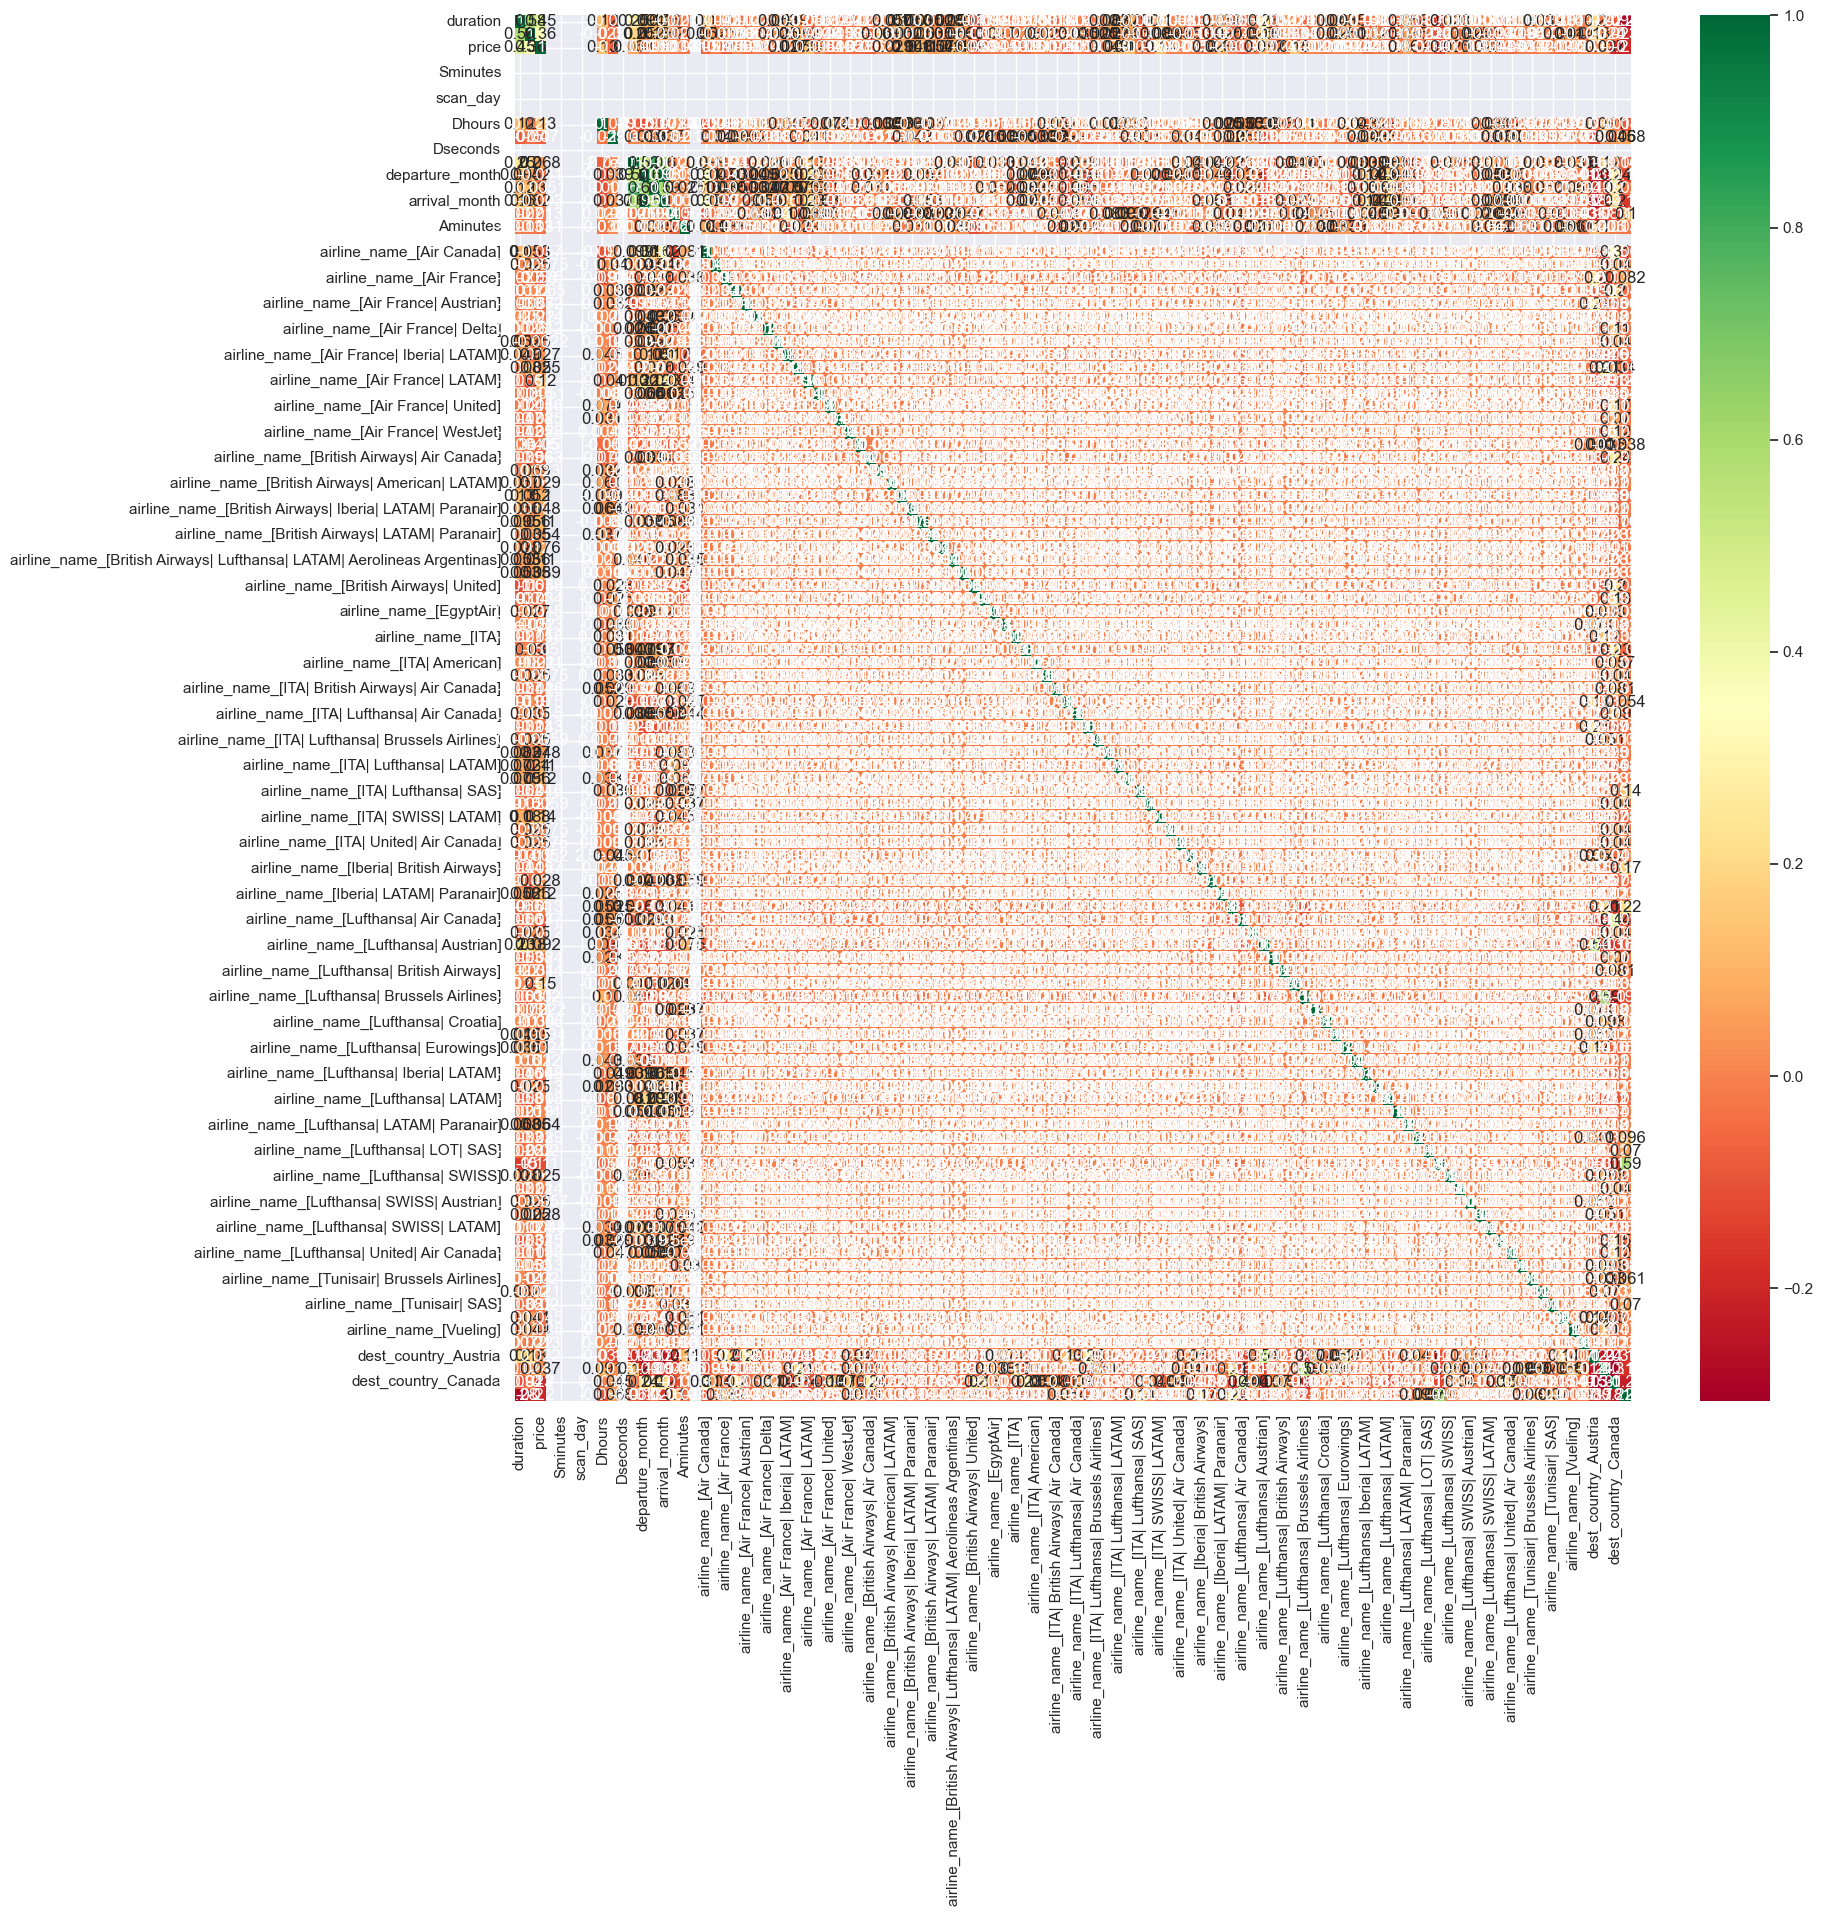

In [260]:
#finds correlation between independent and dependent Attributes.

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot =True, cmap = "RdYlGn")

plt.show()

In [81]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[1.59281492e-02 7.32583291e-03 9.70716040e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.12073815e-04 1.04857325e-04 1.46242962e-06 2.08209385e-05
 4.42243140e-07 2.95015915e-07 2.96364433e-05 1.09113740e-04
 2.80452418e-05 5.02485050e-03 4.96324924e-04 2.05537158e-06]


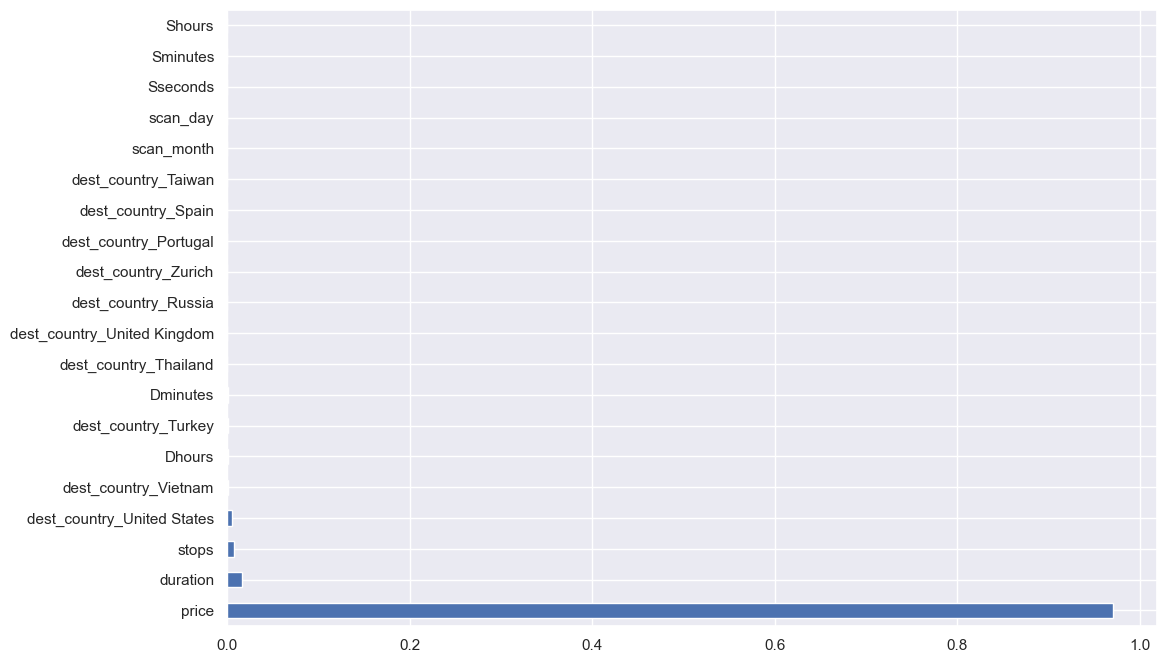

In [82]:
#plot graph of important features
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()
#Graph shows price has the highest importance.

In [83]:
#RandomForestRegressor

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [86]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
y_pred = reg_rf.predict(X_test)

In [88]:
reg_rf.score(X_train, y_train)

0.9999965840376176

In [89]:
reg_rf.score(X_test, y_test)

0.9999885291746573

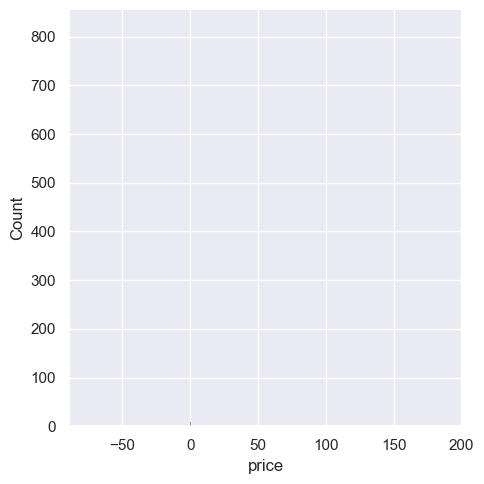

In [91]:
sns.displot(y_test-y_pred)
plt.show()

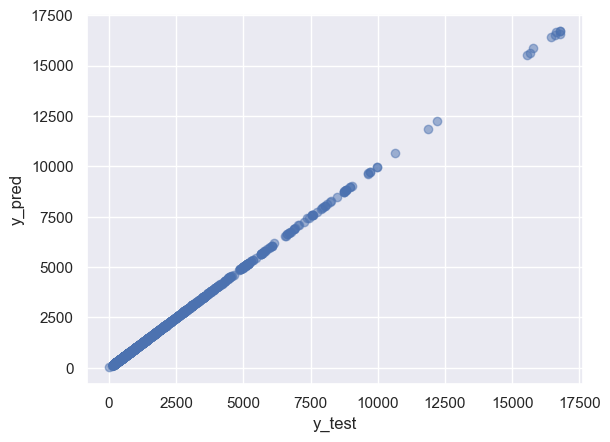

In [92]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [93]:
from sklearn import metrics

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.929869133574011
MSE: 38.281772969314474
RMSE: 6.187226597540652


In [95]:
metrics.r2_score(y_test, y_pred)

0.9999885291746573

In [96]:
print('Model Performance on Training Set:', round(reg_rf.score(X_train, y_train) *100,2))
print('Model Performance on Test Set:', round(reg_rf.score(X_test, y_test) *100,2))

Model Performance on Training Set: 100.0
Model Performance on Test Set: 100.0


In [97]:
#linear Regression

In [98]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [99]:
y_pred = lr.predict(X_test)

In [100]:
lr.score(X_train, y_train)

1.0

In [101]:
lr.score(X_test, y_test)

1.0

In [102]:
print('Model Performance on Training Set:', round(lr.score(X_train, y_train) *100,2))
print('Model Performance on Test Set:', round(lr.score(X_test, y_test) *100,2))

Model Performance on Training Set: 100.0
Model Performance on Test Set: 100.0


In [103]:
from sklearn import metrics

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.941548859685618e-13
MSE: 5.939648285222326e-25
RMSE: 7.706911369168797e-13


In [105]:
metrics.r2_score(y_test, y_pred)

1.0

In [106]:
#logisticregression

In [107]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
y_pred = clf.predict(X_test)

In [109]:
clf.score(X_train, y_train)

0.050208732934672234

In [110]:
clf.score(X_test, y_test)

0.042418772563176894

In [111]:
print('Model Performance on Training Set:', round(clf.score(X_train, y_train) *100,2))
print('Model Performance on Test Set:', round(clf.score(X_test, y_test) *100,2))

Model Performance on Training Set: 5.02
Model Performance on Test Set: 4.24


In [112]:
metrics.r2_score(y_test, y_pred)

0.7424067836184103

In [ ]:
Hyperparameter Tuning

1. RandomizedSearchCV --> fast 
2. GridSearchCV

.Assignn hyperparameters in form of dictionery
.Fit the model
.Check best parameters


In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
#Randomized Search CV

#Number of trees in Random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num =12)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required  at each leaf node
min_samples_leaf = [1,2,5,10]


In [116]:
#create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [117]:
#Random search of parameters, using 5 folds cross validation,
#Search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [118]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.5s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.8s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   6.2s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.4s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.1s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.8s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.3s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.0s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.7s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  11.4s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  15.6s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  16.5s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  15.9s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  17.7s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  16.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  20.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  21.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  20.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  20.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  21.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.6s
[CV] END max_depth=5, max_feat

C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  21.0s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  21.3s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.5s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  18.3s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.4s


C:\Users\R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [119]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [120]:
prediction = rf_random.predict(X_test)

In [122]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

C:\Users\R\AppData\Local\Temp\ipykernel_12416\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


In [123]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [125]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.9140494908062664
MSE: 147.62878687561954
RMSE: 12.150258716406805


In [127]:
#SAVE MODEL AND REUSE IT AGAIN


import pickle
#open a file, where you want to store the data

file = open('flight1_rf.pkl', 'wb')

#dump information to that file
pickle.dump(rf_random, file)

In [128]:
model = open('flight1_rf.pkl', 'rb')
forest = pickle.load(model)

In [129]:
y_prediction = forest.predict(X_test)

In [130]:
metrics.r2_score(y_test, y_prediction)

0.9999557642214963

In [131]:
#SAVE MODEL AND REUSE IT AGAIN


import pickle
#open a file, where you want to store the data

file = open('flight2_lr.pkl', 'wb')

#dump information to that file
pickle.dump(rf_random, file)

In [133]:
model = open('flight2_lr.pkl', 'rb')
linear = pickle.load(model)

In [134]:
y_prediction = linear.predict(X_test)

In [135]:
metrics.r2_score(y_test, y_prediction)

0.9999557642214963